<a href="https://colab.research.google.com/github/mafer2871/AluraStoreChallenge/blob/main/challenge1_DA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación

Identificar las ventas por cada tienda para validar cuál tiene el mayor volumen de ventas.




Ventas totales por tienda (miles) :

Tienda 1: $1,150,880.40
Tienda 2: $1,116,343.50
Tienda 3: $1,098,019.60
Tienda 4: $1,038,375.70

Información de ventas extremas: (miles)
Tipo            Tienda                   Ventas
--------------------------------------------------
Más ventas      Tienda 1          $1,150,880.40
Menos ventas    Tienda 4          $1,038,375.70





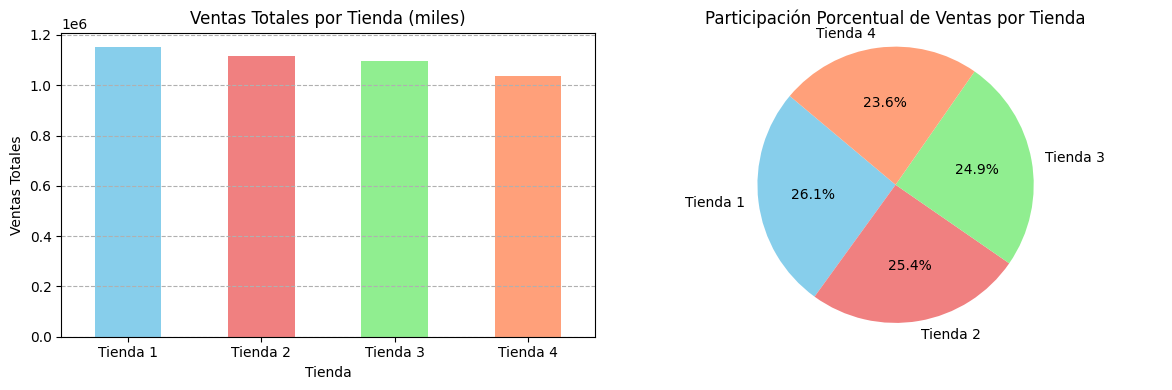

In [2]:
stores = {'Tienda 1': tienda, 'Tienda 2': tienda2,
    'Tienda 3': tienda3, 'Tienda 4': tienda4}


# Función para calcular las ventas totales de una tienda
def total_store_sales(df):

    ventas = 0
    for precio in df['Precio']:
      #Validar que los datos sean válidos, de lo contrario se suma 0
        try:
            ventas += float(precio)
        except (ValueError, TypeError):
            ventas += 0
    return ventas/1000

# Calcular las ventas totales por tienda
total_sales = {}

print("\nVentas totales por tienda (miles) :\n")
for store_name, df_store in stores.items():
    sales = total_store_sales(df_store)
    total_sales[store_name] = sales
    print(f"{store_name}: ${sales:,.2f}")

series_ventas = pd.Series(total_sales)

# Identificar la tienda con más y menos ventas
xtreme_sales = [
    {'tipo': 'Más ventas', 'store': series_ventas.idxmax(), 'ventas': series_ventas.max()},
    {'tipo': 'Menos ventas', 'store': series_ventas.idxmin(), 'ventas': series_ventas.min()}]

print("\nInformación de ventas extremas: (miles)")
print(f"{'Tipo':<15} {'Tienda':<15} {'Ventas':>15}") # Encabezados
print("-" * 50) # Línea separadora

for store_info in xtreme_sales:
    tipo = store_info['tipo']
    Store = store_info['store']
    ventasm = f"${store_info['ventas']:,.2f}"
    print(f"{tipo:<15} {Store:<15} {ventasm:>15}")

print('\n\n')

# Se crea una figura con dos gráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Ajusta el tamaño de la figura
plt.subplots_adjust(wspace=0.4)  # Ajusta el espacio horizontal entre gráficos

# Gráfico de barras en la primera columna (axes[0])
series_ventas.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'], ax=axes[0])
axes[0].set_title('Ventas Totales por Tienda (miles)')
axes[0].set_xlabel('Tienda')
axes[0].set_ylabel('Ventas Totales')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--')

# Gráfico de pastel en la segunda columna (axes[1])
axes[1].pie(series_ventas, labels=series_ventas.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
axes[1].set_title('Participación Porcentual de Ventas por Tienda')
axes[1].axis('equal')

plt.tight_layout()
plt.show()



# 2. Ventas por categoría


Ventas por categoría (miles):

                         Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar   12698.4   14746.9   15060.0   15074.5
Deportes y diversión      39290.0   34744.5   35593.1   33350.1
Electrodomésticos        363685.2  348567.8  329237.9  283260.2
Electrónicos             429493.5  410831.1  410775.8  409476.1
Instrumentos musicales    91299.0  104990.3   77380.9   75102.4
Juguetes                  17995.7   15945.4   19401.1   20262.2
Libros                     8784.9   10091.2    9498.7    9321.3
Muebles                  187633.7  176426.3  201072.1  192528.9





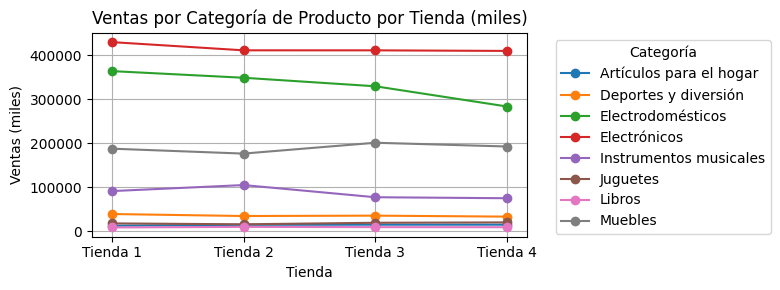

In [ ]:
# Analizar las ventas por categoría para cada tienda, manejando errores y valores nulos
cat_sales = {}

for store_name, df_store in stores.items():
    df_store['Precio'] = pd.to_numeric(df_store['Precio'], errors='coerce')
    df_store['Precio'] = df_store['Precio'].fillna(0)
    # Reemplazar valores nulos o vacíos en 'Categoria de Producto' con 'Sin Categoría'
    df_store['Categoría del Producto'] = df_store['Categoría del Producto'].fillna('Sin Categoría')
    df_store['Categoría del Producto'] = df_store['Categoría del Producto'].replace('', 'Sin Categoría')
    # Agrupar ventas por categoria
    ventas_categoria = df_store.groupby('Categoría del Producto')['Precio'].sum() / 1000
    cat_sales[store_name] = ventas_categoria

# Imprimir ventas por categoria en forma de tabla
df_ventas_categoria = pd.DataFrame(cat_sales)

print("\nVentas por categoría (miles):\n")
print(df_ventas_categoria.fillna(0))
print('\n\n')

# Grafico ventas por categoría

fig, ax = plt.subplots(figsize=(8, 3))
for categoria, ventas_por_tienda in df_ventas_categoria.iterrows():
    ax.plot(df_ventas_categoria.columns, ventas_por_tienda.values, marker='o', label=categoria)

ax.set_xlabel('Tienda')
ax.set_ylabel('Ventas (miles)')
ax.set_title('Ventas por Categoría de Producto por Tienda (miles)')
ax.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
fig.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda



Promedio de calificación por tienda:

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00




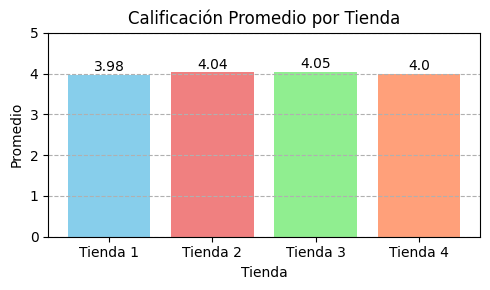

In [ ]:
# Calcular el promedio de calificación por tienda
store_avg_calification = {}

for store_name, df_store in stores.items():
    # Asegurarse de que la columna 'Calificación' sea numérica
    df_store['Calificación'] = pd.to_numeric(df_store['Calificación'], errors='coerce')
    # Calcular el promedio, ignorando los NaN
    promedio = df_store['Calificación'].mean()
    store_avg_calification[store_name] = promedio

print("\nPromedio de calificación por tienda:\n")
for store_name, promedio in store_avg_calification.items():
    print(f"{store_name}: {promedio:.2f}")
print('\n')

# Gráfica del promedio de calificación por tienda
tiendas = list(store_avg_calification.keys())
promedios = list(store_avg_calification.values())

# Definir una lista de colores para cada tienda
colores = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']
plt.figure(figsize=(5, 3))
plt.bar(tiendas, promedios, color=colores)
plt.xlabel('Tienda')
plt.ylabel('Promedio')
plt.title('Calificación Promedio por Tienda')
plt.ylim(0, 5)

# Añadir etiquetas de texto en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos


--- Volumen de ventas por producto en Tienda 1 ---

Top 5 productos más vendidos:
- Microondas: 60
- TV LED UHD 4K: 60
- Armario: 60
- Secadora de ropa: 58
- Mesa de noche: 56

Top 5 productos menos vendidos:
- Ciencia de datos con Python: 39
- Pandereta: 36
- Olla de presión: 35
- Auriculares con micrófono: 33
- Celular ABXY: 33


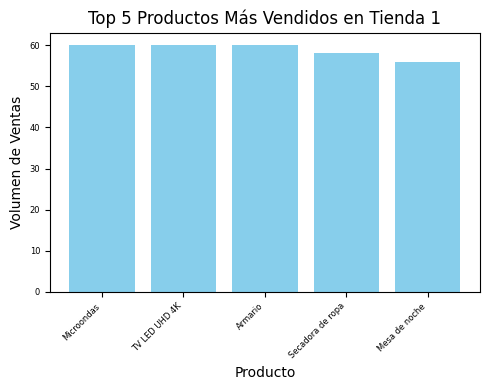


--- Volumen de ventas por producto en Tienda 2 ---

Top 5 productos más vendidos:
- Iniciando en programación: 65
- Microondas: 62
- Batería: 61
- Guitarra acústica: 58
- Pandereta: 58

Top 5 productos menos vendidos:
- Auriculares: 37
- Sillón: 35
- Mesa de comedor: 34
- Impresora: 34
- Juego de mesa: 32


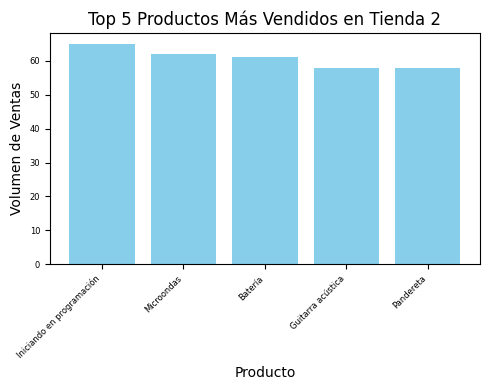


--- Volumen de ventas por producto en Tienda 3 ---

Top 5 productos más vendidos:
- Kit de bancas: 57
- Mesa de comedor: 56
- Cama king: 56
- Set de ollas: 55
- Mesa de noche: 55

Top 5 productos menos vendidos:
- Guitarra eléctrica: 38
- Set de vasos: 36
- Mochila: 36
- Microondas: 36
- Bloques de construcción: 35


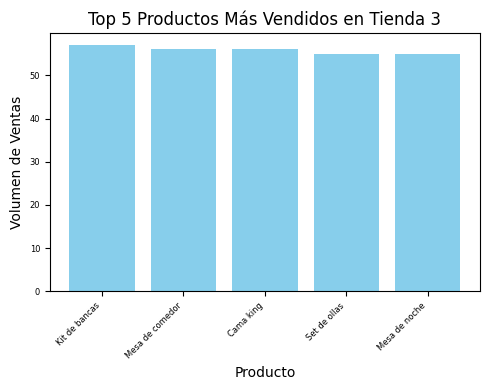


--- Volumen de ventas por producto en Tienda 4 ---

Top 5 productos más vendidos:
- Cama box: 62
- Cubertería: 59
- Dashboards con Power BI: 56
- Cama king: 56
- Carrito de control remoto: 55

Top 5 productos menos vendidos:
- Refrigerador: 38
- Ciencia de datos con Python: 38
- Guitarra acústica: 37
- Armario: 34
- Guitarra eléctrica: 33


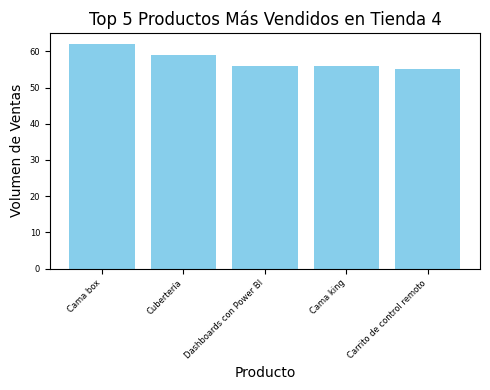

In [ ]:
from types import FunctionType
sales_product_vol = {}

for store_name, df_store in stores.items():
    print(f"\n--- Volumen de ventas por producto en {store_name} ---")

    # Contar la frecuencia de cada producto
    conteo_productos = df_store['Producto'].value_counts()
    sales_product_vol[store_name] = conteo_productos

    top_5_vendidos = conteo_productos.head(5)
    print("\nTop 5 productos más vendidos:")
    for producto, volumen in top_5_vendidos.items():
        print(f"- {producto}: {volumen}")

    bottom_5_vendidos = conteo_productos.tail(5)
    print("\nTop 5 productos menos vendidos:")
    for producto, volumen in bottom_5_vendidos.items():
        print(f"- {producto}: {volumen}")

    # --- Gráfico de los 5 más vendidos ---
    plt.figure(figsize=(5,4))
    plt.bar(top_5_vendidos.index, top_5_vendidos.values, color='skyblue')
    plt.title(f'Top 5 Productos Más Vendidos en {store_name}')
    plt.xlabel('Producto')
    plt.ylabel('Volumen de Ventas')
    plt.xticks(rotation=45, ha='right', fontsize=6)
    plt.yticks(fontsize=6)
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda


Costo de envío promedio por tienda (Miles $):

Tienda 1: 26.02
Tienda 2: 25.22
Tienda 3: 24.81
Tienda 4: 23.46




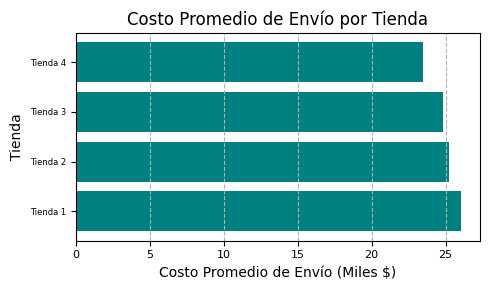

In [ ]:
# Calcular el promedio de costos de envío por tienda
store_avg_shipment = {}

for store_name, df_store in stores.items():
    # Asegurarse de que la columna 'Costo de envío' sea numérica
    df_store['Costo de envío'] = pd.to_numeric(df_store['Costo de envío'], errors='coerce')
    # Calcular el promedio, ignorando los NaN
    avg_shipment = df_store['Costo de envío'].mean()
    store_avg_shipment[store_name] = avg_shipment/1000

print("\nCosto de envío promedio por tienda (Miles $):\n")
for store_name, promedio in store_avg_shipment.items():
    print(f"{store_name}: {promedio:.2f}")
print('\n')

# --- Gráfico del costo promedio de envío por tienda ---
tiendas = list(store_avg_shipment.keys())
promedios = list(store_avg_shipment.values())

plt.figure(figsize=(5, 3))
plt.barh(tiendas, promedios, color='teal')
plt.ylabel('Tienda', fontsize=10)
plt.xlabel('Costo Promedio de Envío (Miles $)', fontsize=10)
plt.title('Costo Promedio de Envío por Tienda')
plt.xticks(fontsize=8)
plt.yticks(fontsize=6)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

# 6. Distribución Geográfica de ventas


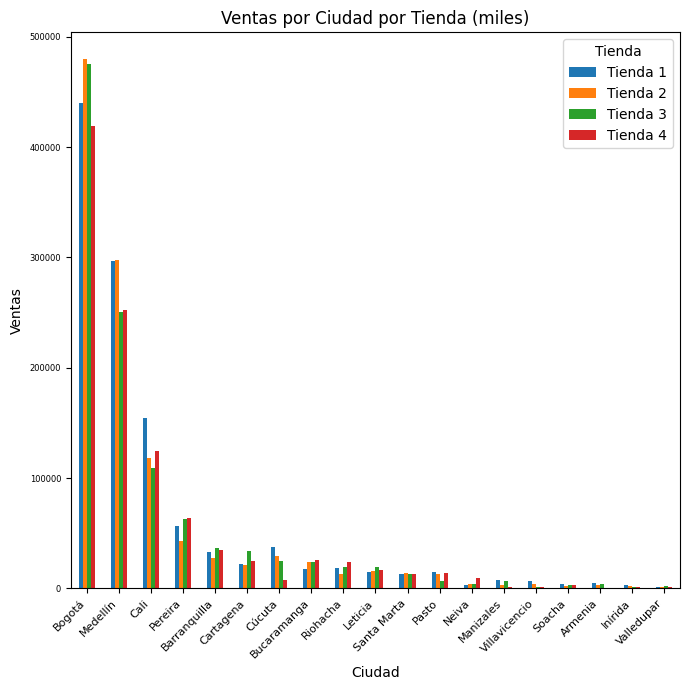

In [ ]:
# Análisis de ventas por ciudad consolidado
ventas_por_ciudad_consolidado = pd.DataFrame()

for store_name, df_store in stores.items():
    # Convertir 'Lugar de Compra' a cadena
    df_store['Lugar de Compra'] = df_store['Lugar de Compra'].astype(str)
    # Calcular ventas por ciudad para la tienda actual
    ventas_ciudad_tienda = df_store.groupby('Lugar de Compra')['Precio'].sum()/1000
    # Renombrar la columna de ventas para indicar la tienda
    ventas_ciudad_tienda = ventas_ciudad_tienda.rename(store_name)
    # Consolidad tiendas
    if ventas_por_ciudad_consolidado.empty:
        ventas_por_ciudad_consolidado = ventas_ciudad_tienda.to_frame()
    else:
        ventas_por_ciudad_consolidado = ventas_por_ciudad_consolidado.join(ventas_ciudad_tienda, how='outer')

# Gráfico de ventas agrupado por tienda y ciudad
ventas_por_ciudad_consolidado = ventas_por_ciudad_consolidado.fillna(0) # Fill NaN with 0 for plotting
ventas_por_ciudad_consolidado_sorted = ventas_por_ciudad_consolidado.sum(axis=1).sort_values(ascending=False).index
ventas_por_ciudad_consolidado = ventas_por_ciudad_consolidado.reindex(ventas_por_ciudad_consolidado_sorted)

ventas_por_ciudad_consolidado.plot(kind='bar', figsize=(7, 7))
plt.title('Ventas por Ciudad por Tienda (miles)')
plt.xlabel('Ciudad', fontsize=10)
plt.ylabel('Ventas', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=6)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()
